# HM1: Logistic Regression.

   ### Name: Simoni Patani


#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also, you should plot their objective values versus epochs and compare their training and testing accuracy. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [49]:
# Load Packages
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [50]:
df = pd.read_csv("data-1.csv")

In [51]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 1.2 Examine and clean data

In [52]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.
target = df.iloc[:,1]
df = df.drop(['id','Unnamed: 32','diagnosis'], axis = 1)

In [53]:
# Transforming from 'M' and 'B' to -1 and 1.
for i in range(target.shape[0]):
    if target[i] == 'M':
        target[i] = -1
    else:
        target[i] = 1

In [54]:
# Target labels (ground truth values). After transforming from 'M' and 'B' to -1 and 1.
target

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
564    -1
565    -1
566    -1
567    -1
568     1
Name: diagnosis, Length: 569, dtype: object

In [55]:
# Data summary post cleaning.
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 1.3. Partition to training and testing sets

In [56]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machine learning.
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size = 0.2)

In [57]:
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
248,10.65,25.22,68.01,347.0,0.09657,0.07234,0.023790,0.016150,0.1897,0.06329,...,12.25,35.19,77.98,455.7,0.14990,0.13980,0.112500,0.06136,0.3409,0.08147
150,13.00,20.78,83.51,519.4,0.11350,0.07589,0.031360,0.026450,0.2540,0.06087,...,14.16,24.11,90.82,616.7,0.12970,0.11050,0.081120,0.06296,0.3196,0.06435
360,12.54,18.07,79.42,491.9,0.07436,0.02650,0.001194,0.005449,0.1528,0.05185,...,13.72,20.98,86.82,585.7,0.09293,0.04327,0.003581,0.01635,0.2233,0.05521
212,28.11,18.47,188.50,2499.0,0.11420,0.15160,0.320100,0.159500,0.1648,0.05525,...,28.11,18.47,188.50,2499.0,0.11420,0.15160,0.320100,0.15950,0.1648,0.05525
417,15.50,21.08,102.90,803.1,0.11200,0.15710,0.152200,0.084810,0.2085,0.06864,...,23.17,27.65,157.10,1748.0,0.15170,0.40020,0.421100,0.21340,0.3003,0.10480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,11.50,18.45,73.28,407.4,0.09345,0.05991,0.026380,0.020690,0.1834,0.05934,...,12.97,22.46,83.12,508.9,0.11830,0.10490,0.081050,0.06544,0.2740,0.06487
213,17.42,25.56,114.50,948.0,0.10060,0.11460,0.168200,0.065970,0.1308,0.05866,...,18.07,28.07,120.40,1021.0,0.12430,0.17930,0.280300,0.10990,0.1603,0.06818
36,14.25,21.72,93.63,633.0,0.09823,0.10980,0.131900,0.055980,0.1885,0.06125,...,15.89,30.36,116.20,799.6,0.14460,0.42380,0.518600,0.14470,0.3591,0.10140
373,20.64,17.35,134.80,1335.0,0.09446,0.10760,0.152700,0.089410,0.1571,0.05478,...,25.37,23.17,166.80,1946.0,0.15620,0.30550,0.415900,0.21120,0.2689,0.07055


# 1.4. Feature scaling

Use the standardization to transform both training and test features

In [58]:
# Standardization
# calculate mu and sig using the training set
d = x_train.shape[1]
mu = np.mean(x_train, axis=0)
sig = np.std(x_train, axis=0)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

print('test mean = ')
print(np.mean(x_test, axis=0))

print('test std = ')
print(np.std(x_test, axis=0))

test mean = 
[-0.0509215   0.03909023 -0.05867635 -0.06012182 -0.16034188 -0.10728676
 -0.14013528 -0.11837425 -0.14064365 -0.09105273  0.01675403 -0.02508014
  0.01750841  0.01372321 -0.04957866 -0.01698624 -0.05404796  0.04552431
  0.05929431 -0.00488348 -0.07076999 -0.05160057 -0.07586259 -0.07222928
 -0.18637676 -0.10481116 -0.14049521 -0.08475051 -0.11101273 -0.08345874]
test std = 
[0.91456907 1.13107659 0.91470571 0.94339358 1.00119949 0.84895068
 0.85283671 0.85983214 0.93445132 0.8979877  1.20636347 1.06951633
 1.17195945 1.37732595 0.84039732 0.95334952 0.80533167 0.96398832
 0.97689559 0.81021003 0.9519693  1.03032042 0.95903331 1.01257314
 0.92091426 0.8478598  0.87771502 0.9517896  0.8775417  0.82119573]


# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistic regression and when $\lambda > 0$, it essentially becomes a regularized logistic regression.

In [59]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)
def objective(w, x, y, lam):
    n = x.shape[0]
    sum_1 = 0
    regularize = (lam/2) * ((np.linalg.norm(w))**2)
    for i in range(n):
        prod = np.dot(y[i]*x[i].T,w)
        sum_1 = sum_1 + np.log(1 + np.exp(-prod))
    sum_2 = sum_1 / n  
    obj = sum_2 + regularize
        
    return obj


# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [60]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):
    n = x.shape[0]
    sum_1 = 0
    regularize = lam * w
    for i in range(n):
        prod = np.dot(y[i]*x[i].T, w)
        sum_1 += (y[i]*x[i]) / (1 + np.exp(prod))
    sum_2 = -sum_1 / n 
    grad = sum_2 + regularize
        
    return grad

In [61]:
# Gradient descent for solving logistic regression
# You will need to do iterative processes (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, w, max_epoch=100):
    obj_val = []
    while max_epoch > 0:
        w = w - (learning_rate * gradient (w, x, y, lam))
        obj_val.append(objective(w, x, y, lam))
        max_epoch = max_epoch - 1
    return w, obj_val

Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [62]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w1 = np.zeros((x_train.shape[1]))

w1 , obj_val1 = gradient_descent(x_train, y_train, 0, 0.1, w1)
print("Weights = ", w1)
print("Objective Values = ", obj_val1)

Weights =  [-0.3827824  -0.30537061 -0.38236534 -0.38843831 -0.14383293 -0.15123794
 -0.323101   -0.40133162 -0.10433936  0.15302978 -0.32832028  0.02511371
 -0.28612654 -0.33605162  0.00507829  0.09620247  0.07749239 -0.03296481
  0.04224762  0.15873702 -0.46290398 -0.39109071 -0.44889685 -0.45258868
 -0.31075074 -0.20372676 -0.29942407 -0.41516034 -0.2779579  -0.11310995]
Objective Values =  [0.5206426070264721, 0.43380790667057406, 0.3812364227798676, 0.3453060458520927, 0.31881711717171846, 0.2982624557129539, 0.2817137507511109, 0.26801555132445665, 0.256429594398481, 0.24646004835661256, 0.2377603231653808, 0.23008006762120656, 0.2232334092972515, 0.21707908451333852, 0.21150754738931205, 0.20643234329978133, 0.2017841792410005, 0.197506751454554, 0.19355374834586286, 0.18988665779268163, 0.18647313637826338, 0.18328577842028754, 0.18030117416491165, 0.17749918026571238, 0.1748623482333739, 0.1723754719066168, 0.17002522563052694, 0.16779987230225435, 0.16568902576865174, 0.16368

In [63]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w1_reg = np.zeros((x_train.shape[1]))
w1_reg , obj_val1_reg = gradient_descent(x_train, y_train, 0.05, 0.1, w1_reg)
print("Weights = ", w1_reg)
print("Objective Values = ", obj_val1_reg)

Weights =  [-0.31345085 -0.24562313 -0.31350936 -0.31779821 -0.11994579 -0.13062165
 -0.26812521 -0.33138977 -0.08946449  0.11887389 -0.26847202  0.02236122
 -0.23496462 -0.27415271  0.00173787  0.06932005  0.059235   -0.03166338
  0.02954752  0.12215804 -0.37825131 -0.31390091 -0.36749353 -0.36936172
 -0.253914   -0.17402302 -0.24887038 -0.34277956 -0.23056809 -0.0998366 ]
Objective Values =  [0.5211548365534798, 0.43581223769468946, 0.38484514086570243, 0.3504860813867014, 0.3255065119763524, 0.30639612807553146, 0.2912302098296037, 0.27885843458710563, 0.26854763678995663, 0.2598065908190507, 0.2522927295834908, 0.24575917385422122, 0.24002304072901373, 0.2349456468954258, 0.23041968477761393, 0.22636065381152642, 0.22270097926602134, 0.2193858798952452, 0.2163704036647904, 0.2136172618222244, 0.2110952198944504, 0.20877788438188835, 0.20664277527614397, 0.20467060815272392, 0.2028447320481562, 0.2011506846031025, 0.1995758365102656, 0.19810910471347626, 0.1967407190733176, 0.195462

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [64]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
    # Objective Values
    Q = np.log(1 + np.exp(np.dot(-yi * xi.T, w)))
    regularizer_obj = (lam / 2) * (w**2)
    Q = Q + regularizer_obj
        
    # gradient
    grad = -(yi * xi) / (1 + np.dot(yi * xi.T, w))
    regularizer_grad = lam * w
    grad = grad + regularizer_grad
    return grad, Q

Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [65]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, w, max_epoch=100):
    obj_val = []
    while max_epoch > 0:
        for i in range(x.shape[0]):
            grad, obj = stochastic_objective_gradient(w, x[i], y[i], lam)
        w = w - grad * learning_rate 
        obj_val.append(np.mean(obj))
        
        max_epoch = max_epoch - 1
        
    return w, obj_val

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [66]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w2 = np.zeros((x_train.shape[1]))
w2, obj_val2 = sgd(x_train, y_train, 0, 0.01, w2)
print("Weights = ", w2)
print("Objective Values = ", obj_val2)
print(len(obj_val2))

Weights =  [ 0.06324738 -0.12375997  0.05177194  0.09311425 -0.1130901  -0.12199436
 -0.06154824 -0.03768276  0.11882592 -0.05806443  0.2387591   0.38274295
  0.22330108  0.17169658  0.18249641  0.05774105  0.01844455 -0.04694934
  0.26633709  0.07375904  0.0549132  -0.01517451  0.00465231  0.08661503
 -0.39793432 -0.33755018 -0.34933422 -0.54991115  0.0564575  -0.40538854]
Objective Values =  [0.693147180559945, 0.633264994744607, 0.5831671553003503, 0.540132273980772, 0.5025023484690545, 0.46917305680491356, 0.43936260997241133, 0.4124923919768323, 0.3881194103667476, 0.3658953532101629, 0.3455404087036939, 0.32682578883890767, 0.30956164324863333, 0.293588449329034, 0.2787707222405925, 0.2649923189291901, 0.2521528654207407, 0.24016499331752536, 0.22895217068626086, 0.21844697715795633, 0.20858971617155372, 0.19932728667930666, 0.19061225705430948, 0.18240209838459412, 0.17465854471784065, 0.1673470553888094, 0.16043636015361218, 0.15389807203778452, 0.14770635596943543, 0.141837643

In [67]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w2_reg = np.zeros((x_train.shape[1]))
w2_reg, obj_val2_reg = sgd(x_train, y_train, 1, 0.01, w2_reg)
print("Weights = ", w2_reg)
print("Objective Values = ", obj_val2_reg)

Weights =  [ 0.04174585 -0.08168664  0.03417159  0.06145921 -0.07464409 -0.08052126
 -0.04062436 -0.02487216  0.07842996 -0.0383249   0.15759076  0.25262599
  0.14738784  0.11332676  0.12045509  0.03811145  0.01217415 -0.03098848
  0.17579336  0.04868398  0.03624496 -0.0100158   0.00307071  0.05716946
 -0.26265291 -0.22279691 -0.23057486 -0.36296383  0.03726426 -0.267573  ]
Objective Values =  [0.693147180559945, 0.6332855914021567, 0.5837862067262416, 0.5417242516619816, 0.5053207645551074, 0.473391635974717, 0.4450991314893866, 0.41982388123985354, 0.3970924690496717, 0.37653351304573435, 0.35784954285841586, 0.340798192489093, 0.325179167442718, 0.31082494122403886, 0.29759394513403453, 0.28536547479127106, 0.274035809076329, 0.2635152044881682, 0.25372553397693676, 0.2445984084635792, 0.2360736654464462, 0.22809814063118733, 0.22062466047741272, 0.21361120911623202, 0.20702023429854047, 0.20081806522235324, 0.19497442115153596, 0.1894619942844681, 0.18425609377812005, 0.17933434047

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [68]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-b matrix
#     xi: data: b-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):
    sum1 = 0
    sum2 = 0
 
    for i in range(len(xi)):
        prod = np.dot(yi[i]*xi[i].T,w)
        sum1 += np.log(1 + np.exp(-prod))
        sum2 += (-yi[i]*xi[i]) / (1 + np.exp(prod))
        
    sum1 = sum1 / len(xi)
    regularize1 = (lam/2) * ((np.linalg.norm(w))**2)
    mbobj = sum1 + regularize1
    
    sum2 = sum2 / len(xi)
    regularize2 = lam * w
    mbgrad = sum2 + regularize2
    
    return mbobj, mbgrad

In [69]:
# Create Mini Batches 
def create_mini_batches(x, y, batch_size = 10):
    indices = [i for i in range(x.shape[0])]
    np.random.shuffle(indices)
    mini_batch = []
    i = 0
    while i < x.shape[0]:
        mini_batch.append(indices [i : i + batch_size -1])
        i = i + batch_size
    
    return mini_batch

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [70]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate, w, max_epoch=100):
    obj_val3 = []
    i = 0
    while max_epoch > 0:
        mini = create_mini_batches(x, y, 10)
        for batches in mini:
            x_mini = [x[i] for i in batches]
            y_mini = [y[i] for i in batches]
            obj_batch = []
            mbobj, mbgrad = mb_objective_gradient(w, x_mini, y_mini, lam)
            w = w - learning_rate * mbgrad
            obj_batch.append(mbobj)
        obj_val3.append(min(obj_batch))
        max_epoch = max_epoch - 1
    return w, obj_val3

Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [71]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w3 = np.zeros((x_train.shape[1]))
w3, obj_val3 = mbgd(x_train, y_train, 0, 0.00001, w3)
print("Weights = ", w3)
print("Objective Values = ", obj_val3)
print(len(obj_val3))

Weights =  [-1.49963450e-02 -8.74237667e-03 -1.52905802e-02 -1.46211735e-02
 -7.81600153e-03 -1.25123736e-02 -1.45287669e-02 -1.61033164e-02
 -7.22898621e-03 -5.95517207e-05 -1.19523966e-02  2.18791328e-04
 -1.16638644e-02 -1.20066487e-02  1.40311278e-03 -6.25773001e-03
 -5.07946239e-03 -8.27154987e-03 -1.29448895e-04 -1.93617679e-03
 -1.61146056e-02 -9.54204685e-03 -1.62793710e-02 -1.53903127e-02
 -9.06933197e-03 -1.24264821e-02 -1.38530191e-02 -1.66186106e-02
 -9.04809449e-03 -7.13235567e-03]
Objective Values =  [0.6917262767463627, 0.6924874217740473, 0.6909341070292015, 0.688599581129232, 0.6889830693499654, 0.6894832878212214, 0.6881161920647291, 0.685306783819709, 0.6823587026289383, 0.6849210025160367, 0.6754626292156041, 0.6846985215267203, 0.6826202352710979, 0.6809818998883073, 0.6698063724676047, 0.6809811909712057, 0.6752546635888145, 0.6719189115816538, 0.6739290120843212, 0.6630092598472792, 0.6725103907317322, 0.6763276278730631, 0.6736585874406474, 0.663903463860508, 0.

In [72]:
# Train regularized logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w3_reg = np.zeros((x_train.shape[1]))
w3_reg, obj_val3_reg = mbgd(x_train, y_train, 0.05, 0.00001, w3_reg)
print("Weights = ", w3_reg)
print("Objective Values = ", obj_val3_reg)
print(len(obj_val3))

Weights =  [-1.50017150e-02 -8.73864743e-03 -1.52903129e-02 -1.46202264e-02
 -7.78045725e-03 -1.24322269e-02 -1.44821500e-02 -1.60816562e-02
 -7.10938574e-03  5.24640871e-05 -1.18915351e-02  2.36661220e-04
 -1.16012939e-02 -1.19589176e-02  1.42836394e-03 -6.18882588e-03
 -5.07130334e-03 -8.28062623e-03 -6.37669683e-05 -1.92005673e-03
 -1.61245593e-02 -9.57148212e-03 -1.62793818e-02 -1.53980782e-02
 -9.08010840e-03 -1.23690645e-02 -1.38131714e-02 -1.66183892e-02
 -9.01035229e-03 -7.08929283e-03]
Objective Values =  [0.6920988305101627, 0.6909404702784054, 0.6884673407655181, 0.6891367162542178, 0.6856651293267111, 0.6862723737139618, 0.6853522356166799, 0.6865581699867133, 0.6864256988060862, 0.6840957158896023, 0.6803648940649891, 0.6841392207628304, 0.6793282978286448, 0.6814595078306682, 0.6790415353339089, 0.681221604845321, 0.6752048369839542, 0.6783188390618957, 0.6737064002683315, 0.6648298653670102, 0.6755470773615279, 0.6733237217586249, 0.6791834250484695, 0.6680568239022968, 

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

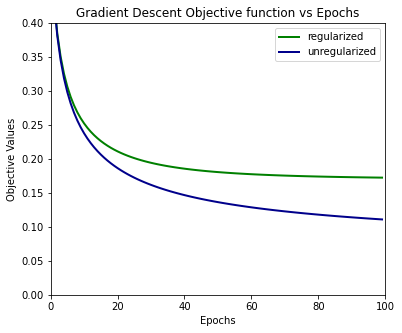

In [73]:
# Plotting objective function values against epochs
epochs = [i for i in range(100)]
plt.figure(figsize=(6,5))
plt.plot(epochs, obj_val1_reg, color='green', lw=2, label = 'regularized');
plt.plot(epochs, obj_val1, color = 'darkblue', lw=2, label = 'unregularized')
plt.xlim([0, 100]);
plt.ylim([0, 0.4]);
plt.ylabel('Objective Values');
plt.xlabel('Epochs');
plt.title('Gradient Descent Objective function vs Epochs');
plt.legend();
plt.show();

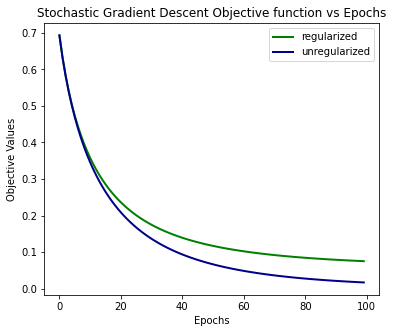

In [74]:
epochs = [i for i in range(100)]
plt.figure(figsize=(6,5));
plt.plot(epochs, obj_val2_reg, color='green', lw=2, label = 'regularized');
plt.plot(epochs, obj_val2, color = 'darkblue', lw=2, label = 'unregularized')

plt.ylabel('Objective Values');
plt.xlabel('Epochs');
plt.title('Stochastic Gradient Descent Objective function vs Epochs');
plt.legend();
plt.show();

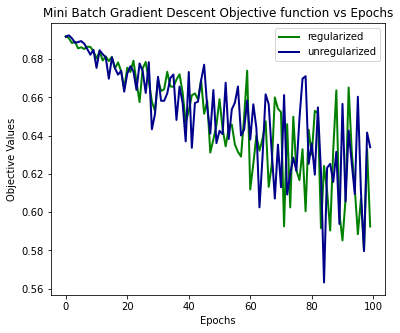

In [75]:
epochs = [i for i in range(100)]
plt.figure(figsize=(6,5));
plt.plot(epochs, obj_val3_reg, color='green', lw=2, label = 'regularized');
plt.plot(epochs, obj_val3, color = 'darkblue', lw=2, label = 'unregularized')

plt.ylabel('Objective Values');
plt.xlabel('Epochs');
plt.title('Mini Batch Gradient Descent Objective function vs Epochs');
plt.legend();
plt.show();

# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [76]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    y_pred = np.zeros(X.shape[0])
    
    for i in range(X.shape[0]):
        prod = np.dot(w.T,X[i])
        if prod < 0:
            y_pred[i] = -1
        else:
            y_pred[i] = 1
    return y_pred

In [77]:
# evaluate training error of logistic regression and regularized version
y_pred_train= predict(w2_reg, x_train)
error = mean_squared_error(y_train, y_pred_train)
error
#accuracy = accuracy_score(y_train, y_pred_train)
#accuracy

1.2923076923076924

In [78]:
# evaluate testing error of logistic regression and regularized version
y_pred_test= predict(w2, x_test)
error= mean_squared_error(y_test, y_pred_test)
y_pred_test_reg = predict(w2_reg, x_test)
error_reg = mean_squared_error(y_test, y_pred_test)
print("Testing error with logistic regression", error)
print("Testing error with logistic regression regularized", error_reg)

Testing error with logistic regression 1.368421052631579
Testing error with logistic regression regularized 1.368421052631579


# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)

""" def parameter_tuning(regularization_value,learning_rate,algorithm,func,x_train,y_train,max_epoch,): weight_gd_reg_tuned,obj_vals_reg_tuned = gradient_descent(x_train,y_train,regularization_value,learning_rate,w,max_epoch=100) weights_sgd_reg_tuned, objvals_sgd_reg_tuned = sgd(x_train, y_train, regularization_value, learning_rate,w,max_epoch) weights_mbgd_reg_tuned, objvals_mbgd_reg_tuned = mbgd(x_train, y_train ,regularization_value, b,learning_rate,w) """